https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# carga los datos de data/temps.csv
df = pd.read_csv(r"C:\Users\Victor\Desktop\Data2 - copia\3-Machine_Learning\1-Supervisado\3-Reg&Class\5-Decision_Trees\ejercicio\data\temps.csv")
df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42


In [13]:
# carga los datos de data/temps.csv


,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


### 2. Lidia con las variables categóricas del dataset

In [6]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [7]:
# decribe
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [9]:
# valores unicos de la columna week
df["week"].unique()

array(['Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs'], dtype=object)

In [11]:
# valores de la columna week
df.loc[:,"week"].values

array(['Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat',
       'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon',
       'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed',
       'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri',
       'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Mon', 'Tues',
       'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs',
       'Fri', 'Sat', 'Sun', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun',
       'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues',
       'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs',
       'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat',
       'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon',
       'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed',
       'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri',
       'Sat', 'Sun', 'Mon', 'Tues', 'We

array(['Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat',
       'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon',
       'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed',
       'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri',
       'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Mon', 'Tues',
       'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs',
       'Fri', 'Sat', 'Sun', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun',
       'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues',
       'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs',
       'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat',
       'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon',
       'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed',
       'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri',
       'Sat', 'Sun', 'Mon', 'Tues', 'We

ESTO ES UN CODIGO PARA CAMBIAR CATEGORIAS A VALORES DE FORMA AUTOMATICA. ESTO COGE TODOS ESOS VALORES UNICOS DE WEEK Y LES ASIGNA UN NUMERO A CADA UNO. OJO!! NO TIENE PORQUE SER LUNES 1, MARTES 2, MIERCOLES 3 AND SO ON

In [12]:
# usamos todos los datos (sin train ni test) pero esto habria que negociarlo...
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['week'])
le.transform(df['week'])

array([0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0,
       2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 1,
       5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 5, 6, 4, 0, 2, 3, 1, 5, 6,
       4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4,
       0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0,
       2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2,
       3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3,
       1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1,
       5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5,
       6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6,
       4, 0, 2, 3, 1, 5, 5, 3, 5, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4,
       0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0,
       2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2,
       1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1,

OTRA FORMA SERIA HACER COLUMNAS DUMMIES:

In [13]:
pd.get_dummies(df['week'])

,Fri,Mon,Sat,Sun,Thurs,Tues,Wed
0,True,False,False,False,False,False,False
1,False,False,True,False,False,False,False
2,False,False,False,True,False,False,False
3,False,True,False,False,False,False,False
4,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...
343,False,False,False,False,False,True,False
344,False,False,False,False,False,False,True
345,False,False,False,False,True,False,False
346,True,False,False,False,False,False,False


PERO AL FINAL, USAMOS LA FORMA "MANUAL" 

In [14]:
#Reemplaza el valor de la columna week con un diccionario
my_dict = {'Mon':0,'Tues':1,'Wed':2,'Thurs':3,'Fri':4,'Sat':5,'Sun':6}

df['week'] = df['week'].replace(my_dict)

C:\Users\Victor\AppData\Local\Temp\ipykernel_13120\2500110800.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['week'] = df['week'].replace(my_dict)


In [16]:
df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,4,45,45,45.6,45,43,50,44,29
1,2016,1,2,5,44,45,45.7,44,41,50,44,61
2,2016,1,3,6,45,44,45.8,41,43,46,47,56
3,2016,1,4,0,44,41,45.9,40,44,48,46,53
4,2016,1,5,1,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,1,42,42,45.2,47,41,50,47,47
344,2016,12,28,2,42,47,45.3,48,41,49,44,58
345,2016,12,29,3,47,48,45.3,48,43,50,45,65
346,2016,12,30,4,48,48,45.4,57,44,46,44,42


SI LOS DATOS SON MUY VARIABLES, A VECES INTERESA MODIFICAR UNA COLUMNA POR UN AGREGADO.
OS ACORDAIS DE LOS AGREGADOS? AQUI SE PIDE AGREGAR TEMPERATURA POR MES USANDO LA MEDIA:

In [22]:
months_g = df.groupby("month")[["temp_1"]].mean().reset_index()
months_g

,month,temp_1
0,1,49.677419
1,2,54.115385
2,3,56.483871
3,4,66.433333
4,5,68.838710
5,6,73.233333
6,7,76.225806
7,8,77.947368
8,9,70.428571
9,10,63.900000


In [26]:
months_g = ...?
months_g

,month,temp_1
0,1,49.677419
1,2,54.115385
2,3,56.483871
3,4,66.433333
4,5,68.838710
5,6,73.233333
6,7,76.225806
7,8,77.947368
8,9,70.428571
9,10,63.900000


ESTO LO DEJO. LO QUE HACEMOS ES UN JOIN PARA AGREGAR LA COLUMNA DE LA MEDIA MENSUAL AL DATO ORIGINAL
RECORDAD QUE NOS GENERARA UNA COLUMNA TEMP_1_X Y TEMP_1_Y POR QUE EL NOMBRE ESTA REPE

In [23]:
df = df.merge(months_g, on='month')

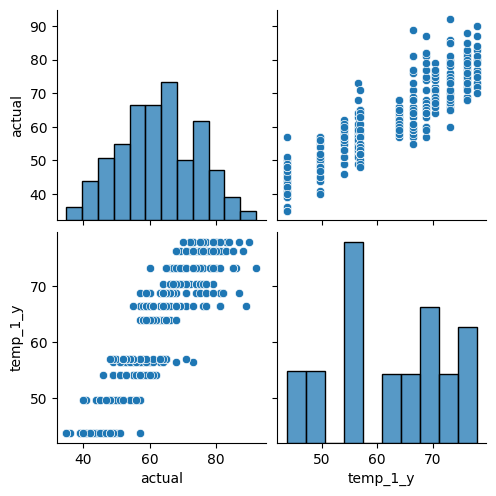

In [24]:
import seaborn as sns
sns.pairplot(df[['actual','temp_1_y']])

In [29]:
df1 = df.drop("year", axis = 1)
df1

,month,day,week,temp_2,temp_1_x,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,temp_1_y
0,1,1,4,45,45,45.6,45,43,50,44,29,49.677419
1,1,2,5,44,45,45.7,44,41,50,44,61,49.677419
2,1,3,6,45,44,45.8,41,43,46,47,56,49.677419
3,1,4,0,44,41,45.9,40,44,48,46,53,49.677419
4,1,5,1,41,40,46.0,44,46,46,46,41,49.677419
...,...,...,...,...,...,...,...,...,...,...,...,...
343,12,27,1,42,42,45.2,47,41,50,47,47,43.741935
344,12,28,2,42,47,45.3,48,41,49,44,58,43.741935
345,12,29,3,47,48,45.3,48,43,50,45,65,43.741935
346,12,30,4,48,48,45.4,57,44,46,44,42,43.741935


In [30]:
df1.corr()

,month,day,week,temp_2,temp_1_x,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,temp_1_y
month,1.000000,-0.000412,-0.004352,0.047651,0.032664,0.120806,0.004529,0.131141,0.127436,0.119786,0.048145,0.038228
day,-0.000412,1.000000,0.010433,-0.046194,-0.000691,-0.021136,-0.021675,-0.021393,-0.030605,-0.013727,0.024592,-0.033155
week,-0.004352,0.010433,1.000000,0.011480,-0.012466,-0.002848,-0.031188,0.010827,0.001928,-0.006685,-0.005890,-0.011040
temp_2,0.047651,-0.046194,0.011480,1.000000,0.857800,0.821560,0.805835,0.813134,0.817374,0.819576,0.583758,0.848433
temp_1_x,0.032664,-0.000691,-0.012466,0.857800,1.000000,0.819328,0.877880,0.810672,0.815162,0.815943,0.541282,0.854456
average,0.120806,-0.021136,-0.002848,0.821560,0.819328,1.000000,0.848365,0.990340,0.990705,0.994373,0.689278,0.955213
actual,0.004529,-0.021675,-0.031188,0.805835,0.877880,0.848365,1.000000,0.838639,0.842135,0.838946,0.569145,0.876224
forecast_noaa,0.131141,-0.021393,0.010827,0.813134,0.810672,0.990340,0.838639,1.000000,0.979863,0.985670,0.669221,0.945439
forecast_acc,0.127436,-0.030605,0.001928,0.817374,0.815162,0.990705,0.842135,0.979863,1.000000,0.983910,0.696054,0.944135
forecast_under,0.119786,-0.013727,-0.006685,0.819576,0.815943,0.994373,0.838946,0.985670,0.983910,1.000000,0.691177,0.946886


<Axes: >

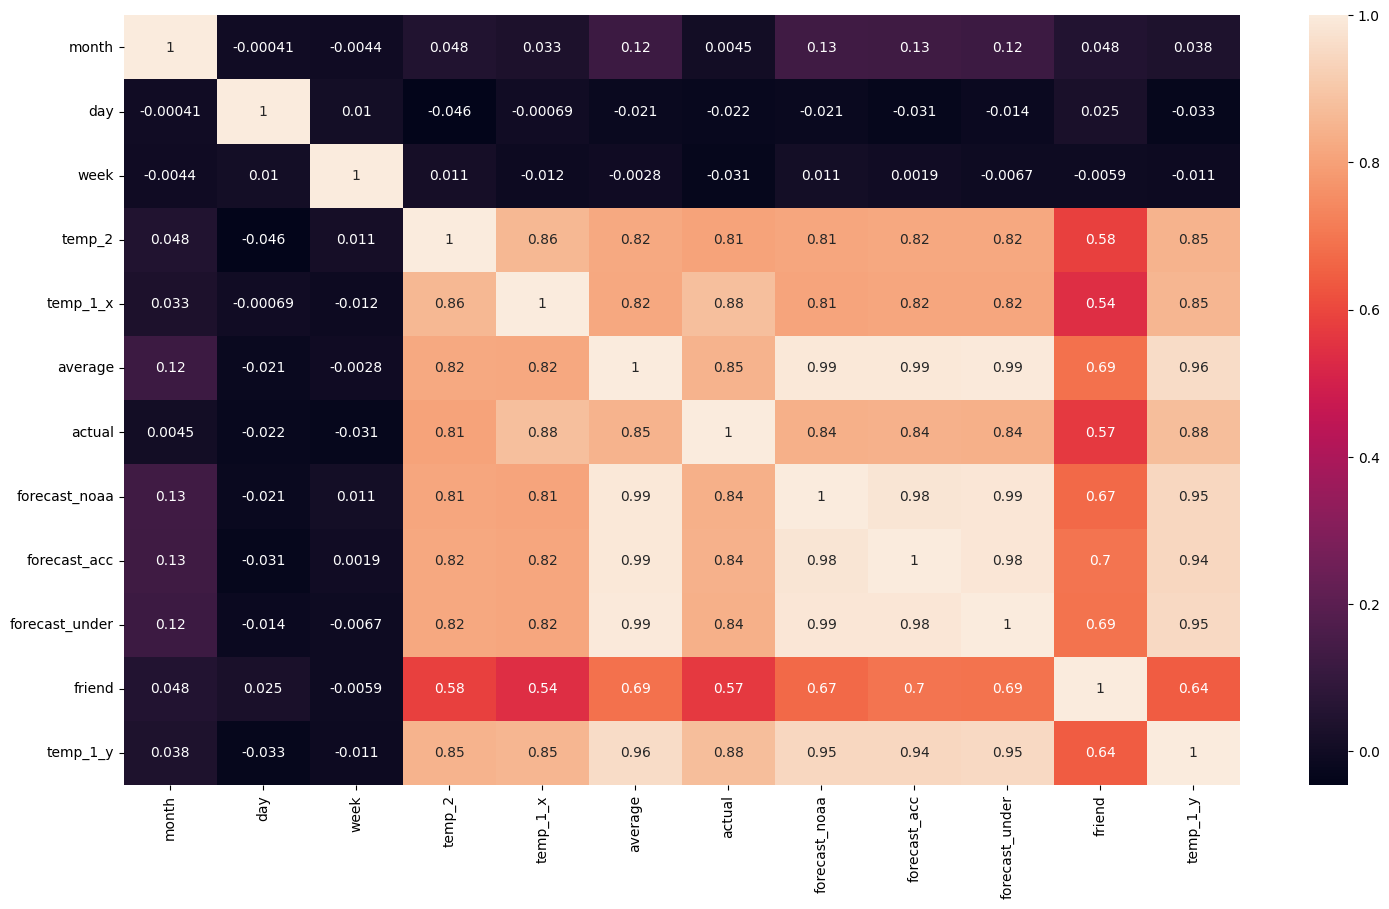

In [34]:
plt.figure(figsize=(18,10))
sns.heatmap(df1.corr(), annot= True)

In [35]:
# HEATMAP

### 3. Divide en train y test

HACEMOS UN TRAIN TEST SPLIT DONDE QUITAMOS LAS COLUMNAS ['year','day','week'] Y USAMOS ACTUAL COMO TARGET

In [46]:
df2 = df1.drop(["day","week"],axis=1)
df2


,month,temp_2,temp_1_x,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,temp_1_y
0,1,45,45,45.6,45,43,50,44,29,49.677419
1,1,44,45,45.7,44,41,50,44,61,49.677419
2,1,45,44,45.8,41,43,46,47,56,49.677419
3,1,44,41,45.9,40,44,48,46,53,49.677419
4,1,41,40,46.0,44,46,46,46,41,49.677419
...,...,...,...,...,...,...,...,...,...,...
343,12,42,42,45.2,47,41,50,47,47,43.741935
344,12,42,47,45.3,48,41,49,44,58,43.741935
345,12,47,48,45.3,48,43,50,45,65,43.741935
346,12,48,48,45.4,57,44,46,44,42,43.741935


In [49]:
X = df2.drop(["actual"],axis=1)
X

,month,temp_2,temp_1_x,average,forecast_noaa,forecast_acc,forecast_under,friend,temp_1_y
0,1,45,45,45.6,43,50,44,29,49.677419
1,1,44,45,45.7,41,50,44,61,49.677419
2,1,45,44,45.8,43,46,47,56,49.677419
3,1,44,41,45.9,44,48,46,53,49.677419
4,1,41,40,46.0,46,46,46,41,49.677419
...,...,...,...,...,...,...,...,...,...
343,12,42,42,45.2,41,50,47,47,43.741935
344,12,42,47,45.3,41,49,44,58,43.741935
345,12,47,48,45.3,43,50,45,65,43.741935
346,12,48,48,45.4,44,46,44,42,43.741935


In [50]:
y = df2["actual"]
y

0      45
1      44
2      41
3      40
4      44
       ..
343    47
344    48
345    48
346    57
347    40
Name: actual, Length: 348, dtype: int64

In [51]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state = 42)

In [52]:
print("X_train", X_train.shape)
print("X_train", X_test.shape)
print("X_train", y_train.shape)
print("X_train", y_test.shape)

X_train (278, 9)
X_train (70, 9)
X_train (278,)
X_train (70,)


### 4. Entrena el modelo


In [53]:
from sklearn.tree import DecisionTreeRegressor
# el modelo se llama dtr
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)


DecisionTreeRegressor()

In [58]:
dtr.feature_names_in_

array(['month', 'temp_2', 'temp_1_x', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'temp_1_y'],
      dtype=object)

Index(['month', 'temp_2', 'temp_1_x', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'temp_1_y'],
      dtype='object')

In [57]:
dtr.feature_importances_

array([0.01762013, 0.03015764, 0.76974714, 0.10303981, 0.01258647,
       0.01558985, 0.02915223, 0.01358483, 0.0085219 ])

In [36]:
# muestra la feature importance del modelo

array([0.01864284, 0.02306268, 0.76979138, 0.09715291, 0.01512062,
       0.02218712, 0.03053199, 0.0179435 , 0.00556695])

### 5. Evaluación de tu modelo
Calcula el coeficiente de determinación. 

Calcula el MAE, MAPE, MSE y RMSE.

In [59]:
y_pred = dtr.predict(X_test)
y_pred

array([79., 68., 57., 68., 76., 76., 71., 79., 71., 71., 68., 65., 39.,
       60., 79., 55., 58., 57., 55., 65., 63., 55., 70., 55., 64., 49.,
       66., 45., 60., 77., 66., 68., 56., 90., 73., 60., 51., 48., 74.,
       40., 77., 57., 81., 40., 59., 75., 56., 87., 52., 39., 45., 39.,
       63., 64., 75., 57., 55., 61., 60., 53., 60., 46., 60., 71., 71.,
       57., 71., 67., 80., 39.])

In [58]:
y_pred = ...
y_pred

array([80., 68., 57., 64., 72., 76., 73., 79., 68., 81., 68., 67., 39.,
       59., 78., 57., 63., 54., 55., 79., 63., 57., 70., 59., 64., 48.,
       66., 45., 60., 77., 66., 64., 57., 88., 73., 60., 51., 51., 74.,
       40., 77., 54., 81., 41., 58., 76., 55., 79., 52., 39., 40., 39.,
       63., 64., 74., 61., 55., 61., 60., 57., 60., 46., 60., 71., 68.,
       57., 71., 67., 80., 39.])

In [60]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.6191165652767886
MAE 5.8
MAPE 0.09048476967795642
MSE 53.25714285714286
RMSE 7.297749163758841


In [59]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.7207740270658431
MAE 4.985714285714286
MAPE 0.08014862331935532
MSE 39.042857142857144
RMSE 6.248428373827865


In [61]:
print("Coeficiente determinación", r2_score(y_train, dtr.predict(X_train)))
print("MAE", mean_absolute_error(y_train, dtr.predict(X_train)))
print("MAPE", mean_absolute_percentage_error(y_train, dtr.predict(X_train)))
print("MSE", mean_squared_error(y_train, dtr.predict(X_train)))
print("RMSE", np.sqrt(mean_squared_error(y_train, dtr.predict(X_train))))

Coeficiente determinación 1.0
MAE 0.0
MAPE 0.0
MSE 0.0
RMSE 0.0


In [42]:
print("Coeficiente determinación", r2_score(y_train, dtr.predict(X_train)))
print("MAE", mean_absolute_error(y_train, dtr.predict(X_train)))
print("MAPE", mean_absolute_percentage_error(y_train, dtr.predict(X_train)))
print("MSE", mean_squared_error(y_train, dtr.predict(X_train)))
print("RMSE", np.sqrt(mean_squared_error(y_train, dtr.predict(X_train))))

Coeficiente determinación 1.0
MAE 0.0
MAPE 0.0
MSE 0.0
RMSE 0.0


### 6. Representa el árbol de decision

In [62]:
df2

,month,temp_2,temp_1_x,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,temp_1_y
0,1,45,45,45.6,45,43,50,44,29,49.677419
1,1,44,45,45.7,44,41,50,44,61,49.677419
2,1,45,44,45.8,41,43,46,47,56,49.677419
3,1,44,41,45.9,40,44,48,46,53,49.677419
4,1,41,40,46.0,44,46,46,46,41,49.677419
...,...,...,...,...,...,...,...,...,...,...
343,12,42,42,45.2,47,41,50,47,47,43.741935
344,12,42,47,45.3,48,41,49,44,58,43.741935
345,12,47,48,45.3,48,43,50,45,65,43.741935
346,12,48,48,45.4,57,44,46,44,42,43.741935


In [98]:
X_test.shape

(70, 9)

In [96]:
y_test.shape

(70,)

In [107]:
from sklearn.tree import DecisionTreeRegressor

# df3 = df2.drop("temp_1_y", axis = 1)
# df4 = df2
X = X_train # petal length and width
y = y_train

tree_clf = DecisionTreeRegressor()
tree_clf.fit(X, y)

DecisionTreeRegressor()

[Text(0.43533214890813254, 0.9705882352941176, 'temp_1_x <= 59.5\nsquared_error = 138.218\nsamples = 278\nvalue = 62.342'),
 Text(0.17151418172690763, 0.9117647058823529, 'average <= 46.85\nsquared_error = 43.932\nsamples = 116\nvalue = 51.414'),
 Text(0.06526104417670683, 0.8529411764705882, 'temp_1_x <= 44.5\nsquared_error = 19.984\nsamples = 32\nvalue = 43.375'),
 Text(0.03614457831325301, 0.7941176470588235, 'actual <= 42.5\nsquared_error = 10.055\nsamples = 17\nvalue = 41.059'),
 Text(0.020080321285140562, 0.7352941176470589, 'forecast_under <= 46.5\nsquared_error = 6.56\nsamples = 5\nvalue = 43.8'),
 Text(0.012048192771084338, 0.6764705882352942, 'temp_1_x <= 43.5\nsquared_error = 2.667\nsamples = 3\nvalue = 42.0'),
 Text(0.008032128514056224, 0.6176470588235294, 'forecast_noaa <= 48.0\nsquared_error = 1.0\nsamples = 2\nvalue = 41.0'),
 Text(0.004016064257028112, 0.5588235294117647, 'squared_error = 0.0\nsamples = 1\nvalue = 40.0'),
 Text(0.012048192771084338, 0.5588235294117647,

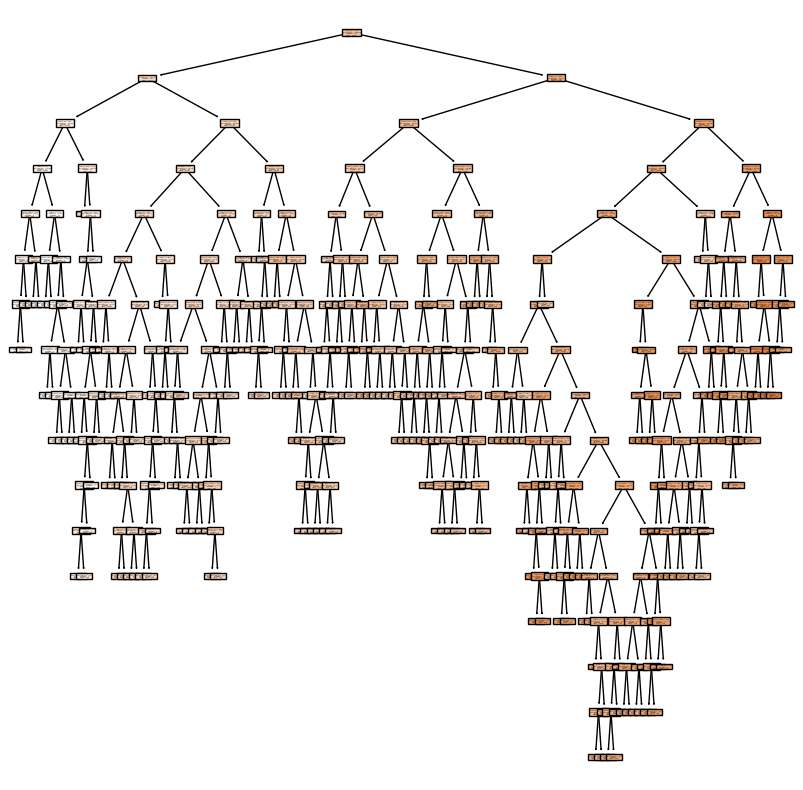

In [108]:
import sklearn.tree 

# X_train.

plt.figure(figsize=(10,10))
sklearn.tree.plot_tree(tree_clf,
               feature_names=dtr.feature_names_in_,
               class_names=True,
               filled = True)

In [ ]:
plt.figure(figsize=(10,10))
sklearn.tree.plot_tree(tree_clf,
               feature_names=iris.feature_names[2:],
               class_names=iris.target_names,
               filled = True);

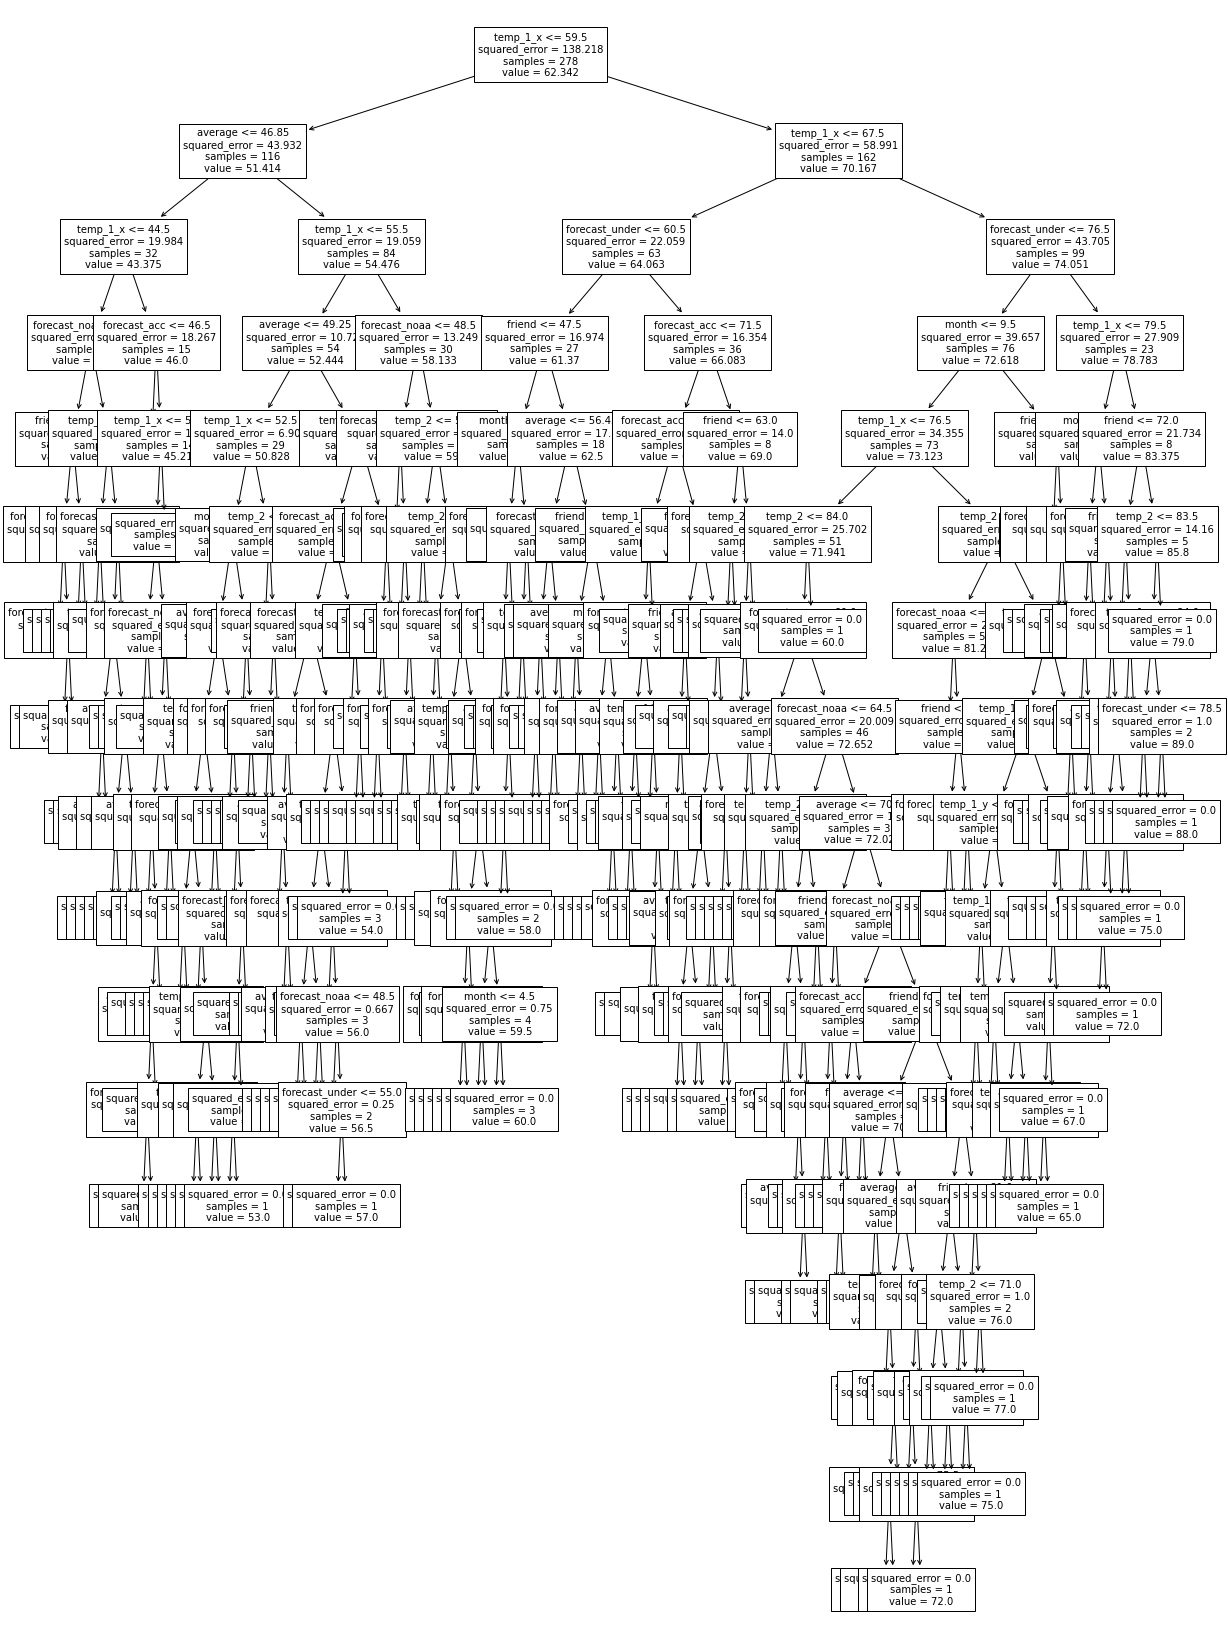

In [47]:
plt.figure(figsize=(20,30))

# SI LO HABEIS HECHO BIEN, ENTENDEREIS PORQUE USAMOS max_depth PARA CAMBIAR la profundidad de la visualización

### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

[Text(0.5, 0.875, 'temp_1_x <= 59.5\nsquared_error = 138.218\nsamples = 278\nvalue = 62.342'),
 Text(0.25, 0.625, 'average <= 46.85\nsquared_error = 43.932\nsamples = 116\nvalue = 51.414'),
 Text(0.125, 0.375, 'temp_1_x <= 44.5\nsquared_error = 19.984\nsamples = 32\nvalue = 43.375'),
 Text(0.0625, 0.125, 'squared_error = 10.055\nsamples = 17\nvalue = 41.059'),
 Text(0.1875, 0.125, 'squared_error = 18.267\nsamples = 15\nvalue = 46.0'),
 Text(0.375, 0.375, 'temp_1_x <= 55.5\nsquared_error = 19.059\nsamples = 84\nvalue = 54.476'),
 Text(0.3125, 0.125, 'squared_error = 10.728\nsamples = 54\nvalue = 52.444'),
 Text(0.4375, 0.125, 'squared_error = 13.249\nsamples = 30\nvalue = 58.133'),
 Text(0.75, 0.625, 'temp_1_x <= 67.5\nsquared_error = 58.991\nsamples = 162\nvalue = 70.167'),
 Text(0.625, 0.375, 'average <= 60.8\nsquared_error = 22.059\nsamples = 63\nvalue = 64.063'),
 Text(0.5625, 0.125, 'squared_error = 16.974\nsamples = 27\nvalue = 61.37'),
 Text(0.6875, 0.125, 'squared_error = 16.354

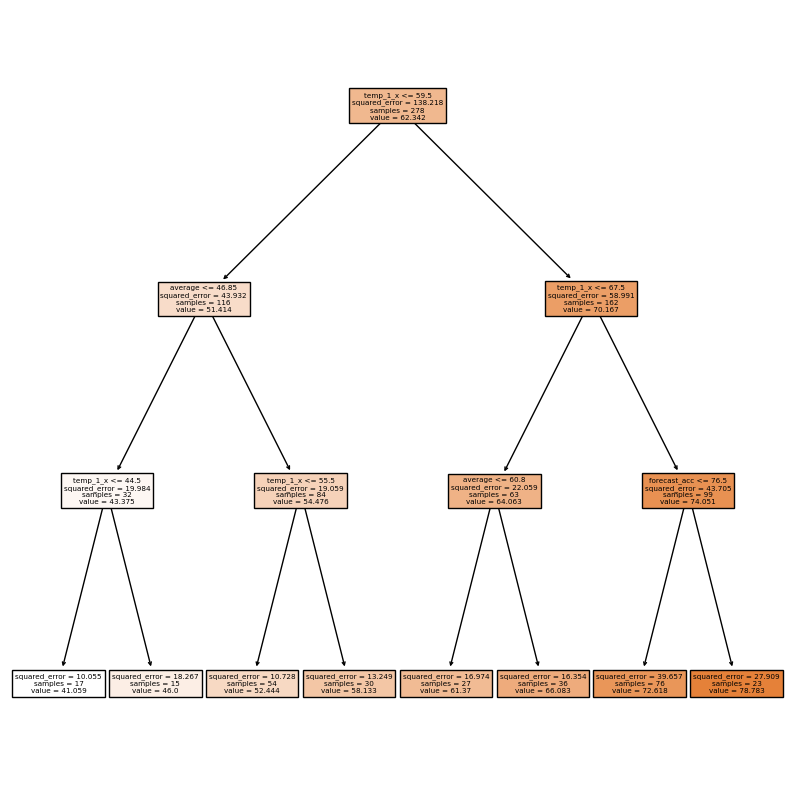

In [106]:
import sklearn.tree 

# X_train.
# df3 = df2.drop("temp_1_y", axis = 1)
# df4 = df2
X = X_train # petal length and width
y = y_train

tree_clf = DecisionTreeRegressor(max_depth=3,
                                  random_state=42)
tree_clf.fit(X, y)
plt.figure(figsize=(10,10))
sklearn.tree.plot_tree(tree_clf,
               feature_names=dtr.feature_names_in_,
               class_names=True,
               filled = True)

### 8. Vuelve a evaluar tu modelo

In [109]:
y_pred = tree_clf.predict(X_test)
print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.6761264785213036
MAE 5.142857142857143
MAPE 0.08167108436560193
MSE 45.285714285714285
RMSE 6.729466121893644


In [61]:
y_pred = ....
print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.7608677663462975
MAE 4.424444494299118
MAPE 0.06938377135428464
MSE 33.43673777437395
RMSE 5.782450844959596


### 9. Vuelve a representar su árbol

[Text(0.5, 0.875, 'temp_1_x <= 59.5\nsquared_error = 138.218\nsamples = 278\nvalue = 62.342'),
 Text(0.25, 0.625, 'average <= 46.85\nsquared_error = 43.932\nsamples = 116\nvalue = 51.414'),
 Text(0.125, 0.375, 'temp_1_x <= 44.5\nsquared_error = 19.984\nsamples = 32\nvalue = 43.375'),
 Text(0.0625, 0.125, 'squared_error = 10.055\nsamples = 17\nvalue = 41.059'),
 Text(0.1875, 0.125, 'squared_error = 18.267\nsamples = 15\nvalue = 46.0'),
 Text(0.375, 0.375, 'temp_1_x <= 55.5\nsquared_error = 19.059\nsamples = 84\nvalue = 54.476'),
 Text(0.3125, 0.125, 'squared_error = 10.728\nsamples = 54\nvalue = 52.444'),
 Text(0.4375, 0.125, 'squared_error = 13.249\nsamples = 30\nvalue = 58.133'),
 Text(0.75, 0.625, 'temp_1_x <= 67.5\nsquared_error = 58.991\nsamples = 162\nvalue = 70.167'),
 Text(0.625, 0.375, 'average <= 60.8\nsquared_error = 22.059\nsamples = 63\nvalue = 64.063'),
 Text(0.5625, 0.125, 'squared_error = 16.974\nsamples = 27\nvalue = 61.37'),
 Text(0.6875, 0.125, 'squared_error = 16.354

<Figure size 1500x1500 with 0 Axes>

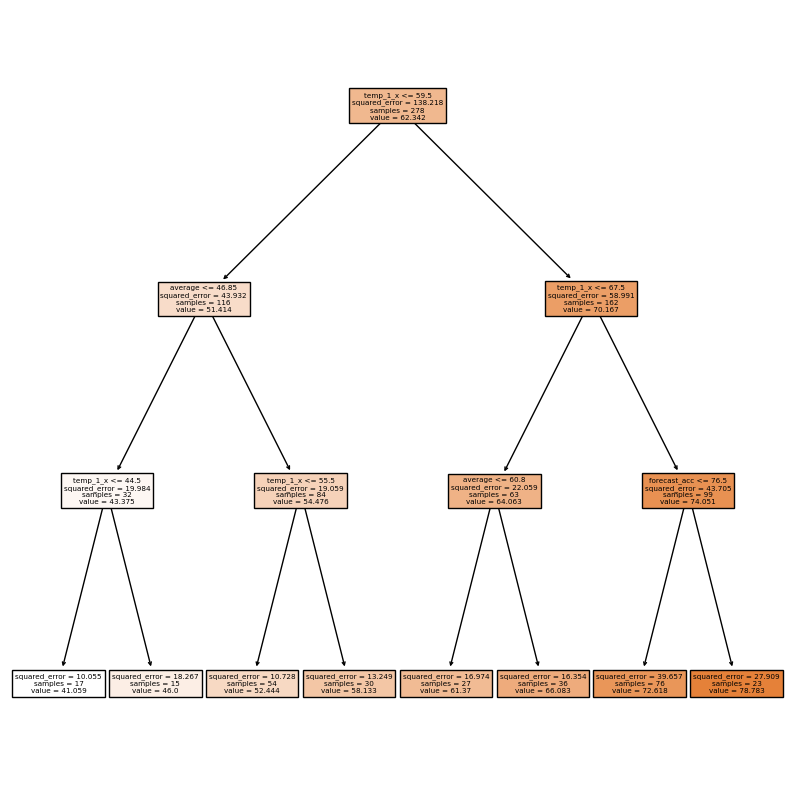

In [111]:
plt.figure(figsize=(15,15))
tree_clf = DecisionTreeRegressor(max_depth=3,
                                  random_state=42)
tree_clf.fit(X, y)

plt.figure(figsize=(10,10))
sklearn.tree.plot_tree(tree_clf,
               feature_names=dtr.feature_names_in_,
               class_names=True,
               filled = True)

### 10. Obten el `feature_importances` de cada variable en el último modelo

In [112]:
tree_clf.feature_importances_

array([0.        , 0.        , 0.88020751, 0.09902152, 0.        ,
       0.        , 0.02077097, 0.        , 0.        ])

In [65]:
# importancias

array([0.        , 0.        , 0.88020751, 0.09902152, 0.        ,
       0.        , 0.02077097, 0.        , 0.        ])

In [113]:
X_train.columns

Index(['month', 'temp_2', 'temp_1_x', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'temp_1_y'],
      dtype='object')

In [66]:
# columnas de X_train

Index(['month', 'temp_2', 'temp_1_x', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'temp_1_y'],
      dtype='object')

In [114]:
pd.DataFrame({'features': X_train.columns, 'importances': tree_clf.feature_importances_}).sort_values('importances', ascending=False)

,features,importances
2,temp_1_x,0.880208
3,average,0.099022
6,forecast_under,0.020771
0,month,0.000000
1,temp_2,0.000000
4,forecast_noaa,0.000000
5,forecast_acc,0.000000
7,friend,0.000000
8,temp_1_y,0.000000


FIJAOS QUE SOLO USA 3 COLUMNAS...

In [120]:
X1 = df1[['temp_1_x','average','forecast_under']]
X1.shape

(348, 3)

In [124]:
y1 = df["temp_1_y"]
y1.shape

(348,)

In [127]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size = 0.20, random_state = 42)

In [69]:
# repetimos train test split pero solo nos quedamos las columnas que sirven para algo ['temp_1_x','average','forecast_under']



In [128]:
dtr_3 =DecisionTreeRegressor(max_depth=3,
                                  random_state=42)


In [130]:
dtr_3.fit(X1_train,y1_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [131]:
y1_pred = dtr_3.predict(X1_test)

In [132]:
print("Coeficiente determinación", r2_score(y1_test, y1_pred))
print("MAE", mean_absolute_error(y1_test, y1_pred))
print("MAPE", mean_absolute_percentage_error(y1_test, y1_pred))
print("MSE", mean_squared_error(y1_test, y1_pred))
print("RMSE", np.sqrt(mean_squared_error(y1_test, y1_pred)))

Coeficiente determinación 0.9512874235174875
MAE 1.6636422782153673
MAPE 0.02785870003684867
MSE 4.816365485304294
RMSE 2.194621945872294


### 11. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día no va a hacer una temperatura máxima a 15ºC

VAMOS A TRANSFORMAR UN PROBLEMA DE REGRESION EN CLASIFICACION. GENERAREMOS UNA CLASE DONDE PONDREMOS 1 SI LA TEMPERATURA PASA DE 59 (GRADOS FAHRENHEIT), Y SI NO 0.

In [133]:
df['target_clas'] = np.where(df['actual']>59,1,0)
df[['actual','target_clas']].head()

,actual,target_clas
0,45,0
1,44,0
2,41,0
3,40,0
4,44,0


<Axes: >

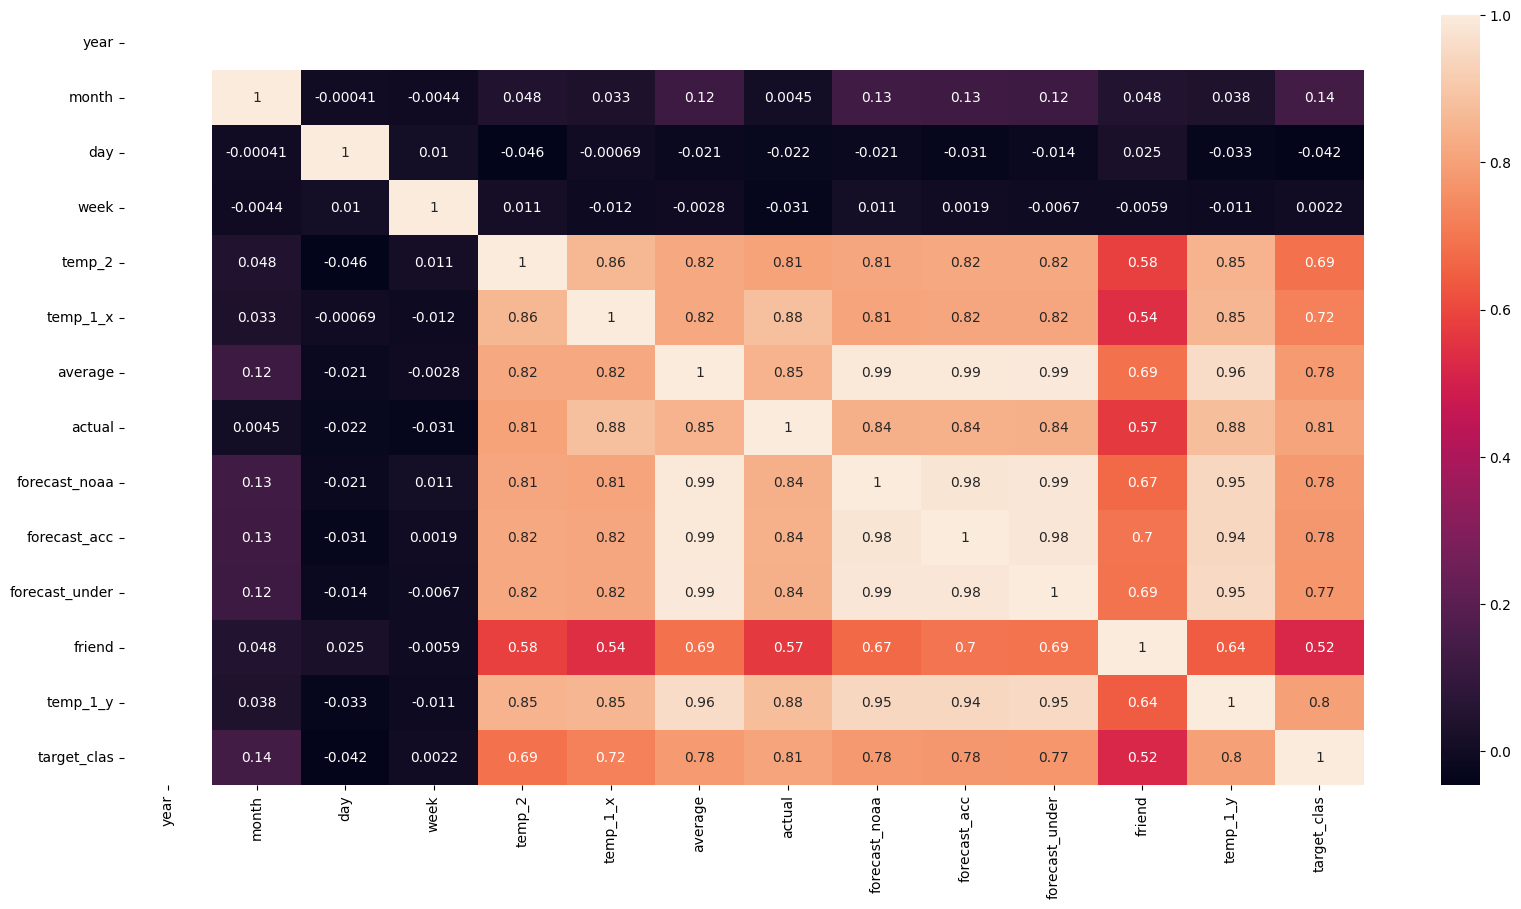

In [135]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

In [136]:
df['target_clas'].value_counts()

target_clas
1    204
0    144
Name: count, dtype: int64

In [137]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['year','day','week','actual','target_clas']), df['target_clas'], test_size=0.2, random_state=42)

In [138]:
# ENRTRENA UN MODELO DE CLASIFICACION LLAMADO dtc
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=3,random_state=42)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [139]:
X_train.columns

Index(['month', 'temp_2', 'temp_1_x', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'temp_1_y'],
      dtype='object')

In [94]:
X_train.columns

Index(['month', 'temp_2', 'temp_1_x', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'temp_1_y'],
      dtype='object')

In [140]:
dtc.feature_importances_

array([0.        , 0.        , 0.08751759, 0.83792502, 0.05793051,
       0.        , 0.01076818, 0.0058587 , 0.        ])

In [93]:
# dtc feature importance

array([0.        , 0.        , 0.08751759, 0.83792502, 0.05793051,
       0.        , 0.01076818, 0.0058587 , 0.        ])

In [ ]:
features_train, labels_train, features_test, labels_test = makeTerrainData()
X = features_train
Y = labels_train
clf = DecisionTreeClassifier()
clf = clf.fit(X,Y)
labels_test = clf.predict(features_test)

acc = accuracy_score(labels_test, labels_train)

In [143]:
y_pred = dtc.predict(X_test)

In [144]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9

In [89]:
# accuracy de dtc en test

0.9

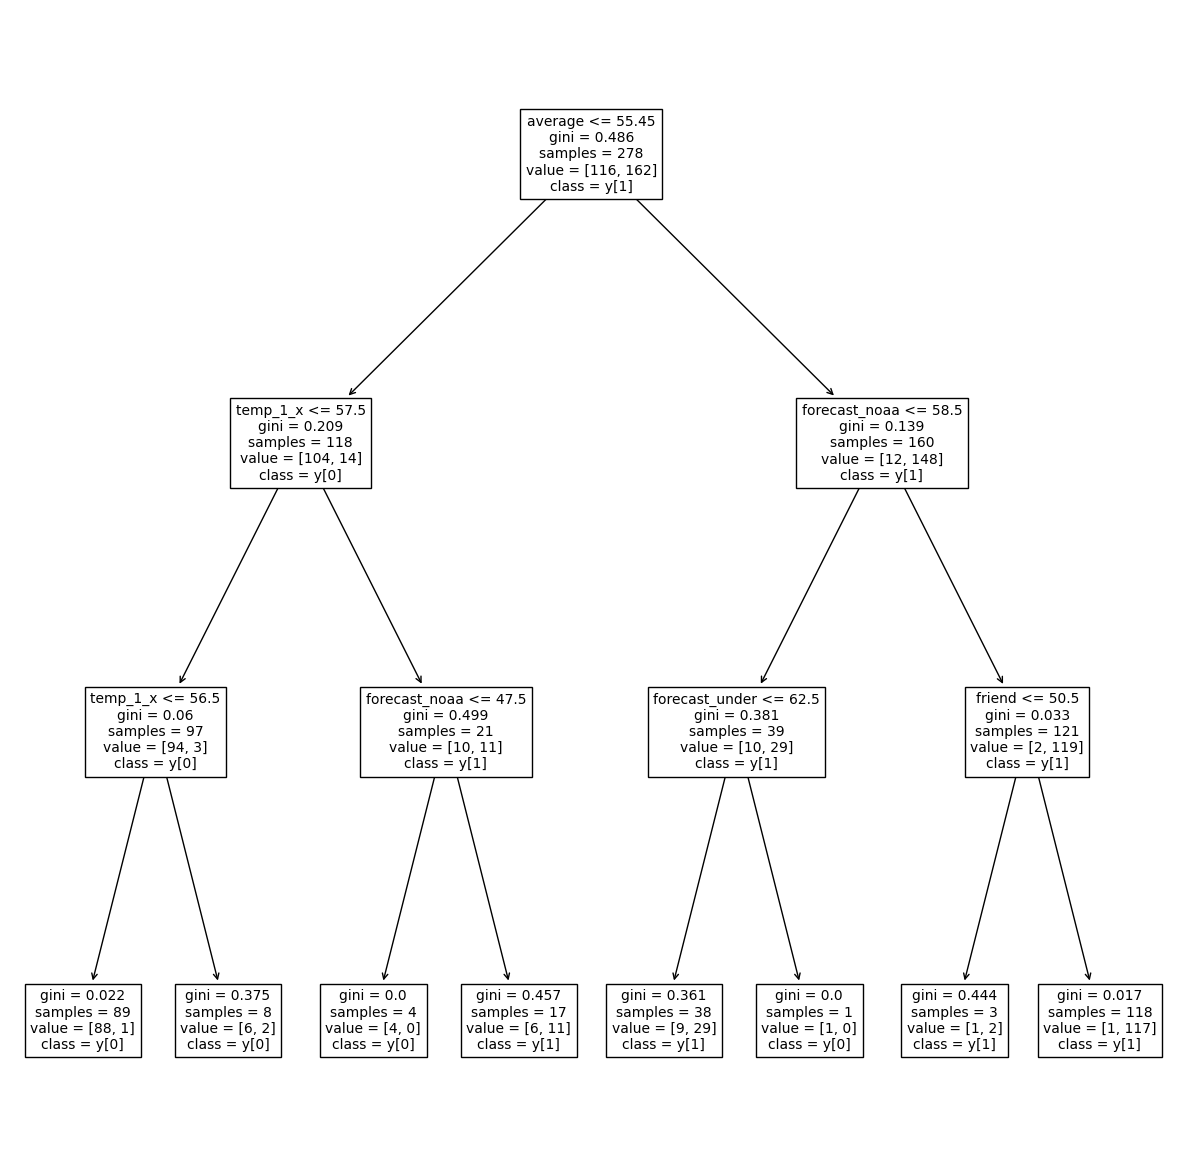

In [150]:
plt.figure(figsize=(15,15))

sklearn.tree.plot_tree(dtc, feature_names = X_train.columns, class_names =True , fontsize=10); #max_depth cambia la profundidad de la visualización

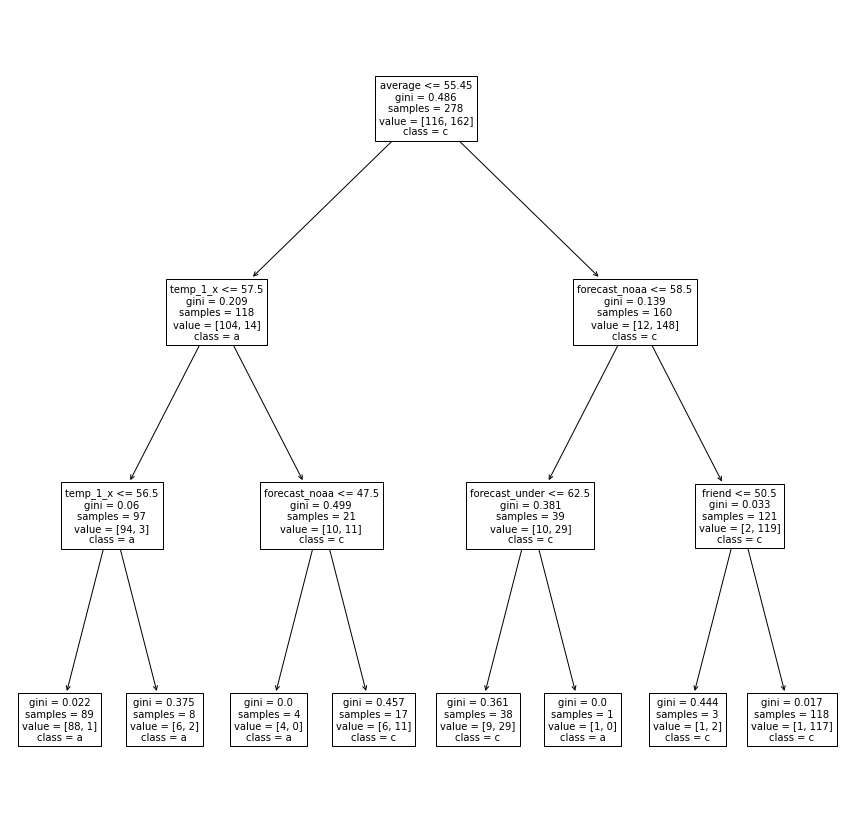

In [90]:
plt.figure(figsize=(15,15))

plot_tree(dtc, feature_names = X_train.columns, class_names = 'actual', fontsize=10); #max_depth cambia la profundidad de la visualización

COMPARA LA ACCURACY CON UN LOGISTIC REGRESSOR A PELO

In [152]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_pred, y_test)

c:\Users\Victor\miniconda3\envs\ML_ENV\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8142857142857143

In [95]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y1_train)
y_pred = lr.predict(X_test)
accuracy_score(y_pred, y_test)

C:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8428571428571429

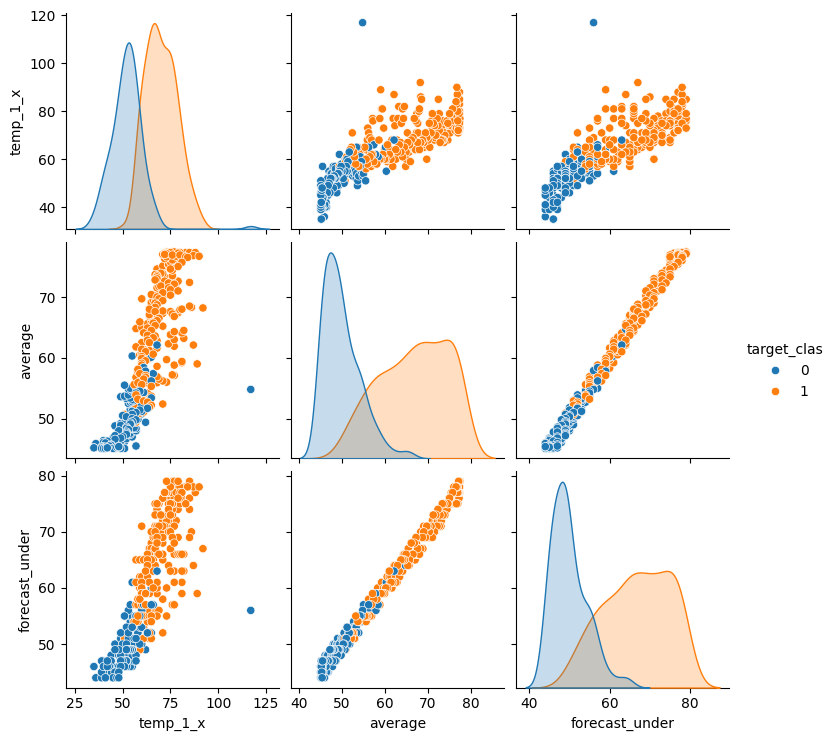

In [153]:
sns.pairplot(df[['temp_1_x','average','forecast_under','target_clas']], hue='target_clas')

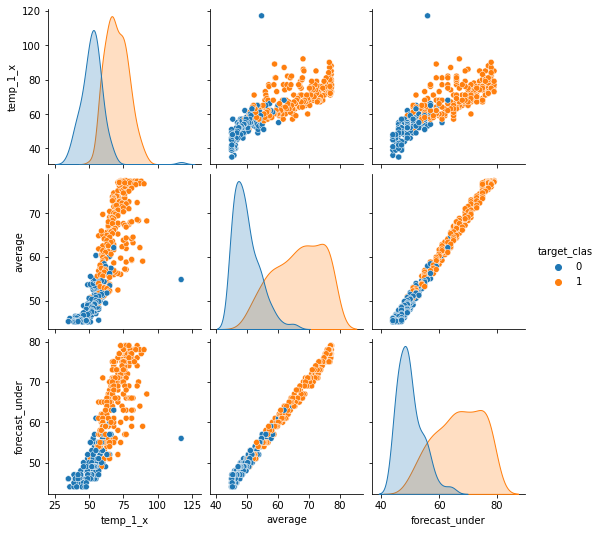

In [97]:
sns.pairplot(df[['temp_1_x','average','forecast_under','target_clas']], hue='target_clas')

### 12. BONUS TRACK: Repite el experimEnto con un un nuevo modelo `RandomForestClassifier` . A lo facil

In [154]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=3, random_state=42)
rfc.fit(X_train,y_train)


RandomForestClassifier(max_depth=3, random_state=42)

In [155]:
accuracy_score(y_test,rfc.predict(X_test))

0.9285714285714286

In [99]:
accuracy_score(y_test,rfc.predict(X_test))

0.9428571428571428